In [1]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotx
import seaborn as sns
from plotly.subplots import make_subplots
import pickle
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
plt.style.use(matplotx.styles.dracula)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_csv('../Data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Text(0.5, 1.0, 'Correlation Analysis')

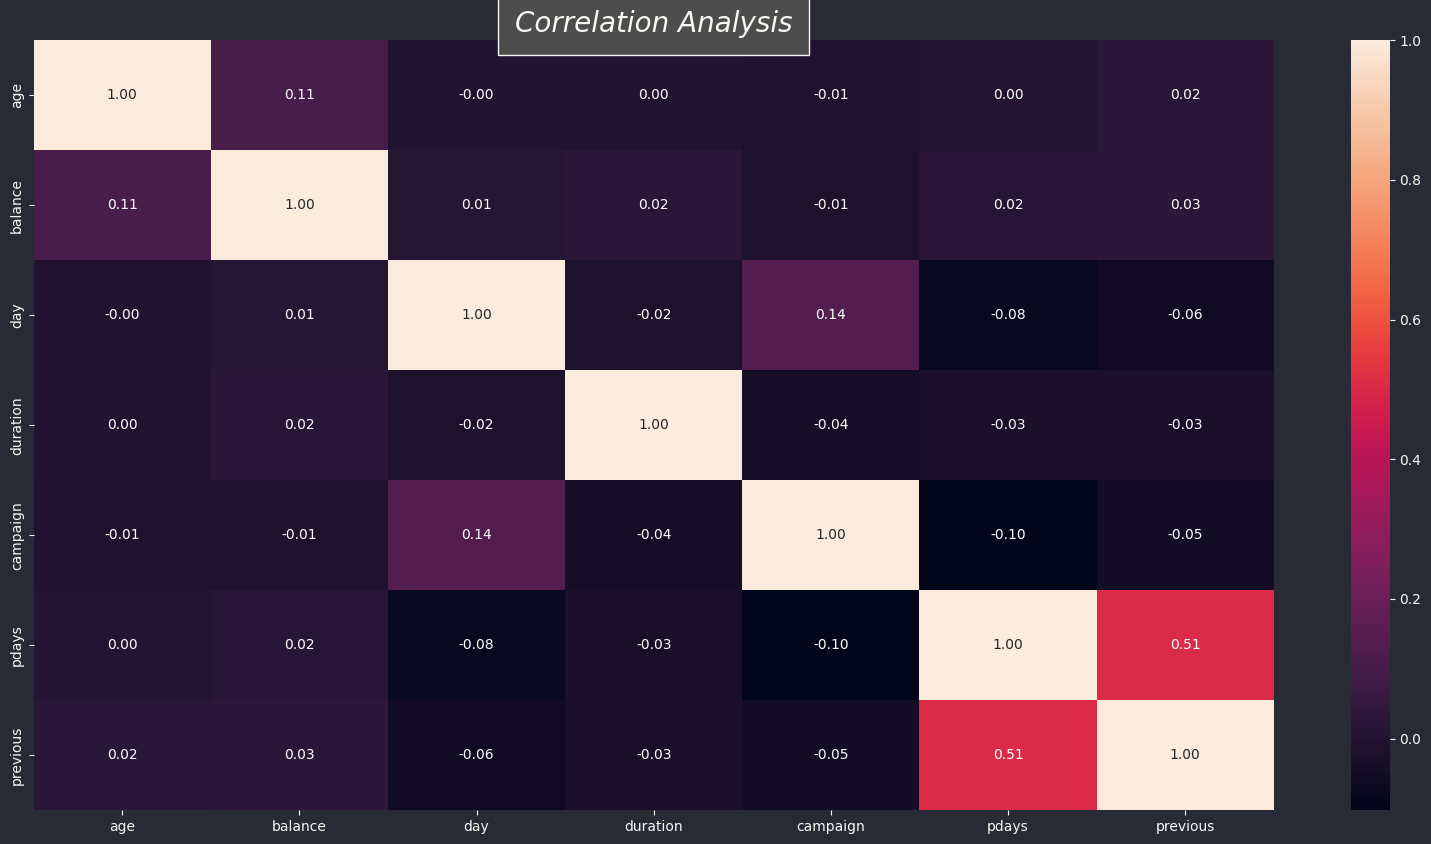

In [5]:
# correlation matrix and heatmap to stand on important features
corr_matrix = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, fmt = '0.2f',  annot = True)
plt.title("Correlation Analysis",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")

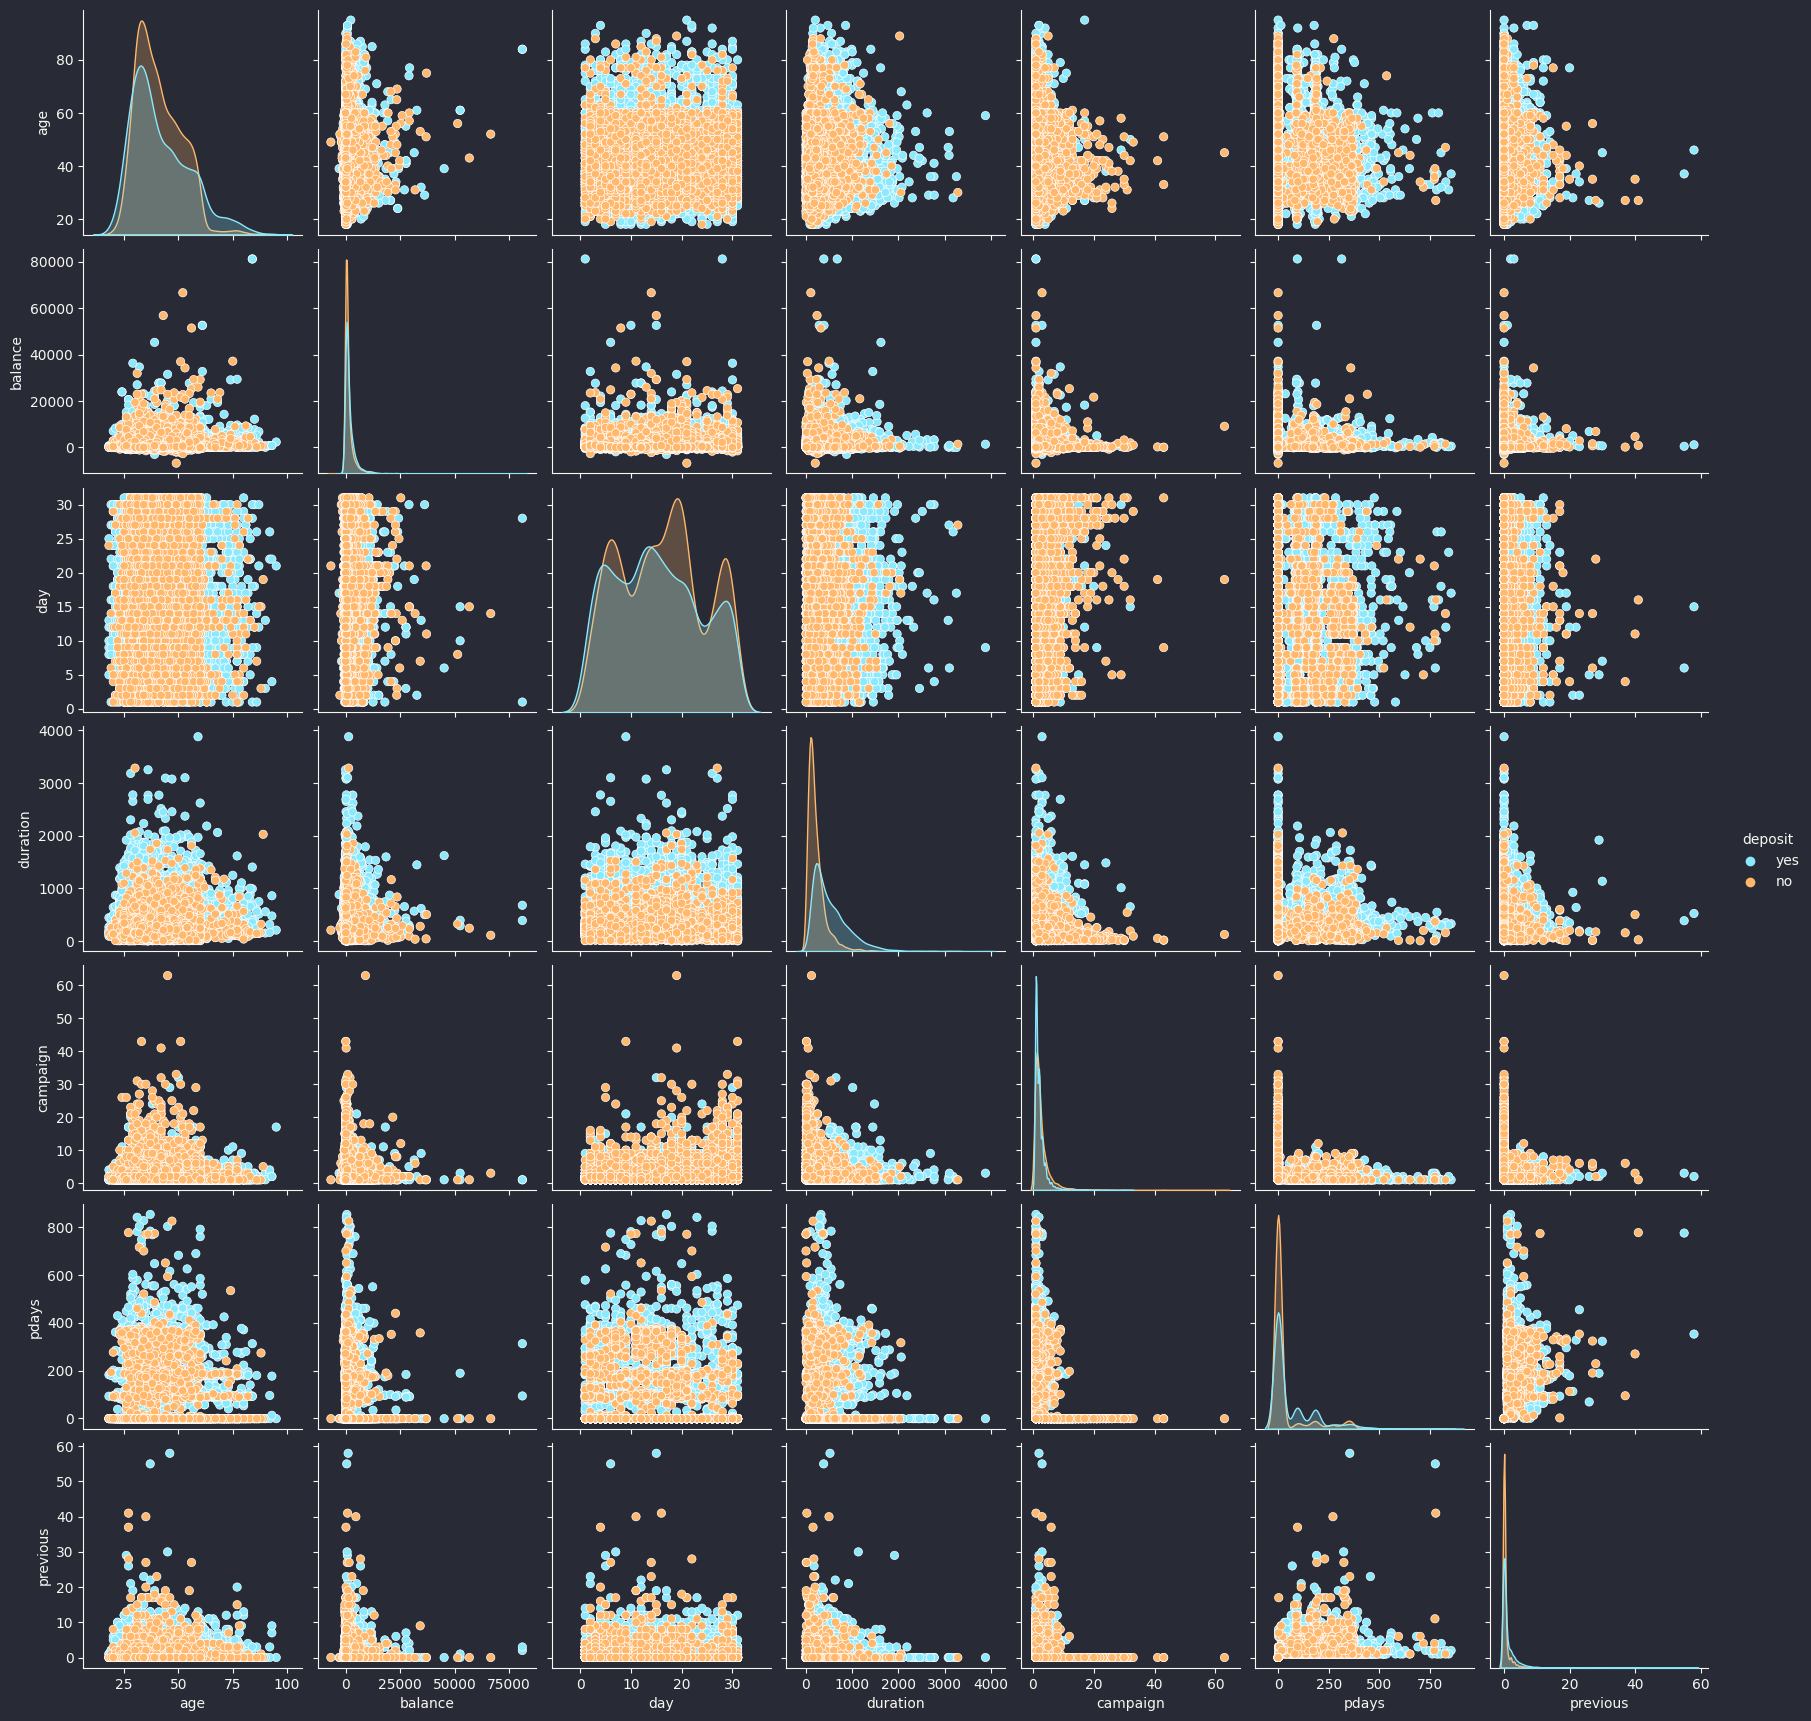

In [6]:
#search for linear and non-linear relationships
sns.pairplot(df,hue="deposit")

In [4]:
df.job=df.job.str.replace('admin.','admin')

In [5]:
#LabelEncoding for cat.s
job_le=LabelEncoder()
marital_le=LabelEncoder()
education_le=LabelEncoder()
default_le=LabelEncoder()
housing_le=LabelEncoder()
loan_le=LabelEncoder()
contact_le=LabelEncoder()
month_le=LabelEncoder()
poutcome_le=LabelEncoder()
deposit_le=LabelEncoder()


df["job_enc"]=job_le.fit_transform(df['job'])
df["marital_enc"]=marital_le.fit_transform(df['marital'])
df["education_enc"]=education_le.fit_transform(df['education'])
df["default_enc"]=default_le.fit_transform(df['default'])
df["housing_enc"]=housing_le.fit_transform(df['housing'])
df["loan_enc"]=loan_le.fit_transform(df['loan'])
df["contact_enc"]=contact_le.fit_transform(df['contact'])
df["month_enc"]=month_le.fit_transform(df['month'])
df["poutcome_enc"]=poutcome_le.fit_transform(df['poutcome'])
df["deposit_enc"]=deposit_le.fit_transform(df['deposit'])

In [6]:
df2=df.drop(["job","marital","education","default","housing","loan","contact","month","poutcome","deposit"],axis=1)
df2.head()

,age,balance,day,duration,campaign,pdays,previous,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc,contact_enc,month_enc,poutcome_enc,deposit_enc
0,59,2343,5,1042,1,-1,0,0,1,1,0,1,0,2,8,3,1
1,56,45,5,1467,1,-1,0,0,1,1,0,0,0,2,8,3,1
2,41,1270,5,1389,1,-1,0,9,1,1,0,1,0,2,8,3,1
3,55,2476,5,579,1,-1,0,7,1,1,0,1,0,2,8,3,1
4,54,184,5,673,2,-1,0,0,1,2,0,0,0,2,8,3,1


In [72]:
df2.to_csv("New_Bank_Data.csv",index=False)

In [7]:
df2.shape

(11162, 17)

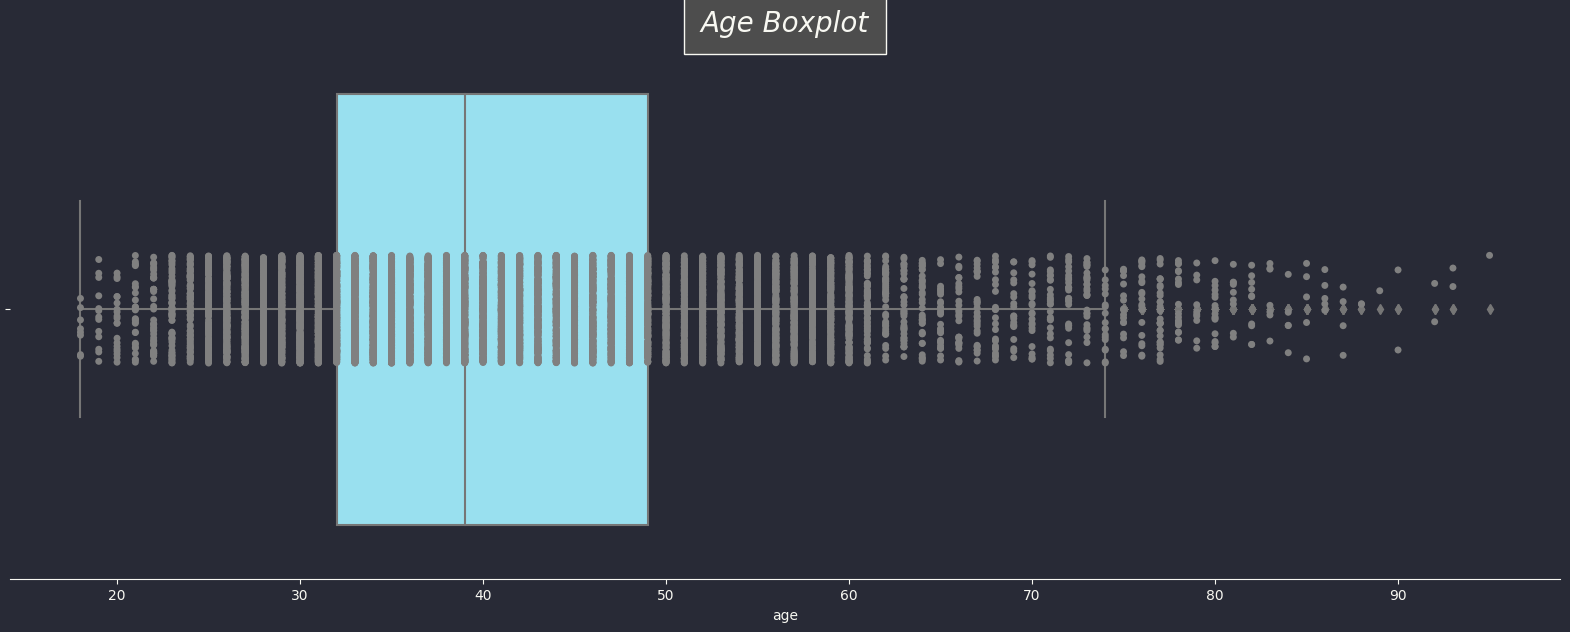

In [8]:
with plt.style.context(matplotx.styles.dracula):
    plt.figure(figsize = (20,7))
    sns.boxplot(x=df["age"])
    sns.stripplot(x=df["age"],color="grey")
    plt.title("Age Boxplot",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")
    sns.despine(top=True, right=True, left=True, bottom=False)
    
    plt.grid(False)
    
    
    


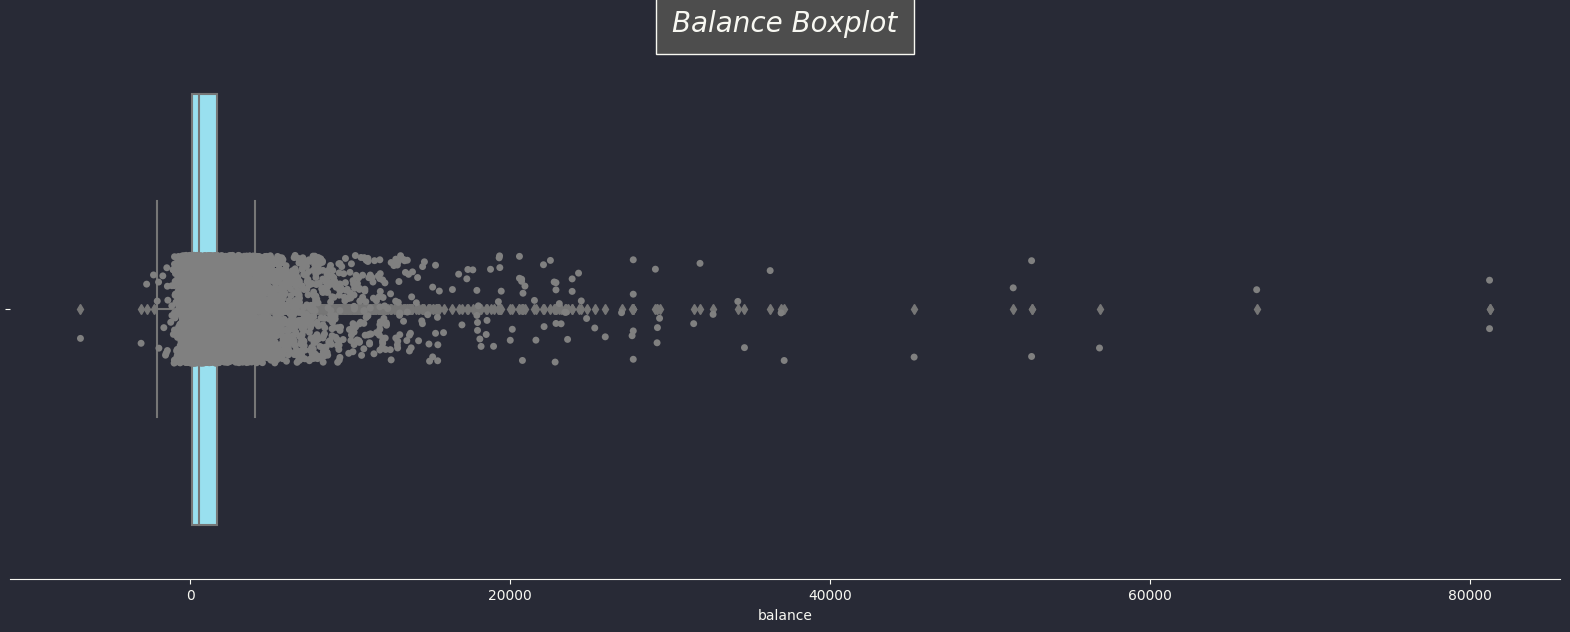

In [9]:
with plt.style.context(matplotx.styles.dracula):
    plt.figure(figsize = (20,7))
    sns.boxplot(x=df["balance"])
    sns.stripplot(x=df["balance"],color="grey")
    plt.title("Balance Boxplot",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")
    sns.despine(top=True, right=True, left=True, bottom=False)

    plt.grid(False)

<AxesSubplot:>

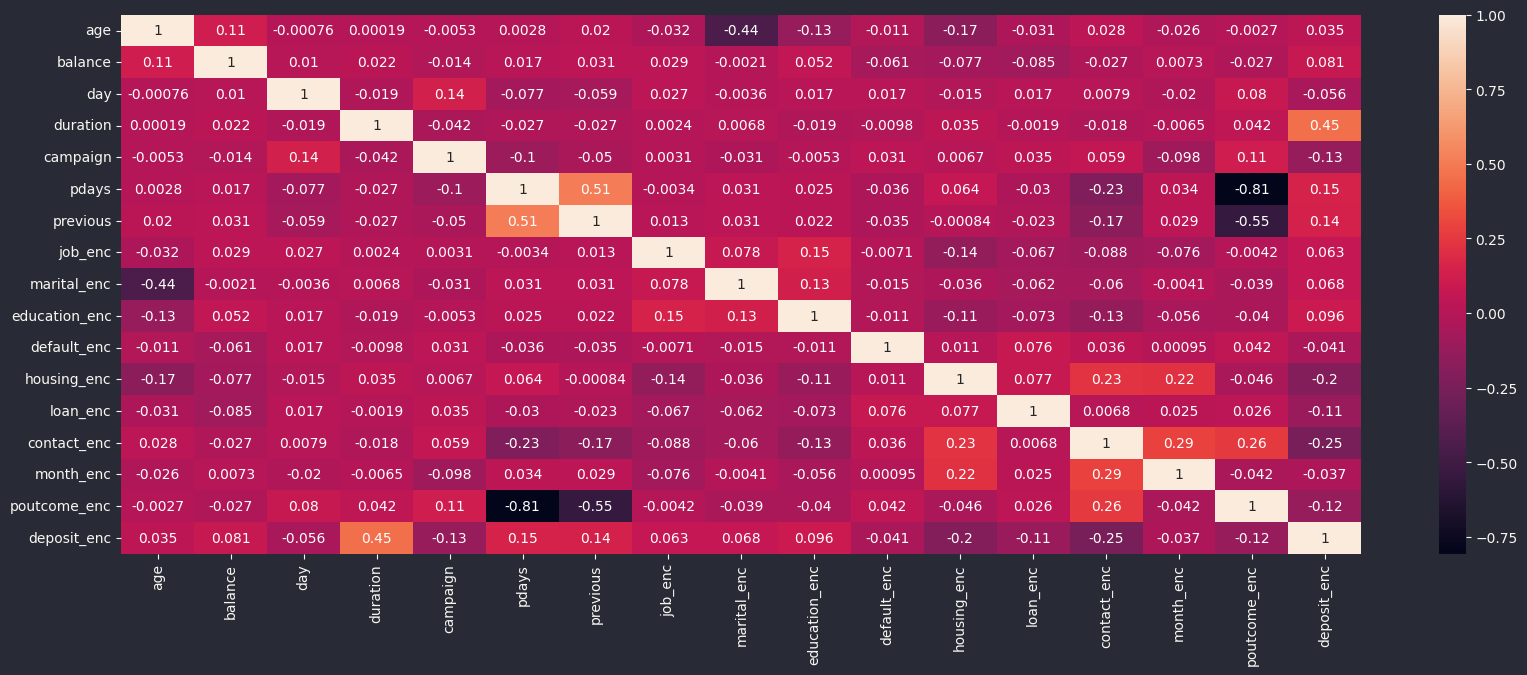

In [10]:
#corr for new features
plt.figure(figsize = (20,7))
sns.heatmap(df2.corr(),annot=True)

In [11]:
#data splitting
X=df2.drop("age",axis=1)
y=df2["age"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8929, 16), (2233, 16))

In [12]:
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
LassoRegressionModel = Lasso(alpha=1.0,random_state=33,normalize=False)
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RandomForestRegressorModel = RandomForestRegressor()
GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') 
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')    
BaggingRegressor=BaggingRegressor(base_estimator=xgb.XGBRegressor(learning_rate=0.1,random_state=33))

Models = [LinearRegressionModel,SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
          GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel,BaggingRegressor]

In [13]:
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')

for Model LinearRegression
Train Score is : 0.2618994950493674
Test Score is : 0.22653132633008988
MAE value is  : 8.37990540787175
MSE value is  : 111.68364995694854
MdSE value is  : 7.222239293353738
for Model SGDRegressor
Train Score is : -96.28182186622122
Test Score is : -117.34833883452272
MAE value is  : 65.98509000816172
MSE value is  : 17088.700418424425
MdSE value is  : 36.23829246745686
for Model Lasso
Train Score is : 0.19917016349950312
Test Score is : 0.18364470435444946
MAE value is  : 8.646657048850486
MSE value is  : 117.87618837461625
MdSE value is  : 7.619291776728041
for Model Ridge
Train Score is : 0.2618994657884287
Test Score is : 0.2265414756528732
MAE value is  : 8.379871792651482
MSE value is  : 111.68218446332016
MdSE value is  : 7.219358260938833
for Model RandomForestRegressor
Train Score is : 0.9318880680553238
Test Score is : 0.5189819735214235
MAE value is  : 6.739287953425885
MSE value is  : 69.4557526645768
MdSE value is  : 5.819999999999993
for Model 

In [14]:
#tunning Rf 
SelectedModel = RandomForestRegressor(random_state=42)
SelectedParameters = {'n_estimators':[100,200,500],'max_depth':[2,4,8,10]}



GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,
                               cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[
    ['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

All Results are :
     mean_test_score  std_test_score                                  params  \
0          0.285930        0.005157   {'max_depth': 2, 'n_estimators': 100}   
1          0.285990        0.005014   {'max_depth': 2, 'n_estimators': 200}   
2          0.285995        0.005113   {'max_depth': 2, 'n_estimators': 500}   
3          0.455638        0.023589   {'max_depth': 4, 'n_estimators': 100}   
4          0.455053        0.024400   {'max_depth': 4, 'n_estimators': 200}   
5          0.453047        0.024761   {'max_depth': 4, 'n_estimators': 500}   
6          0.502758        0.010231   {'max_depth': 8, 'n_estimators': 100}   
7          0.503760        0.011227   {'max_depth': 8, 'n_estimators': 200}   
8          0.505046        0.011150   {'max_depth': 8, 'n_estimators': 500}   
9          0.505134        0.010070  {'max_depth': 10, 'n_estimators': 100}   
10         0.505838        0.011115  {'max_depth': 10, 'n_estimators': 200}   
11         0.507409        0.0110

In [15]:
# remove outliers then try again
cols = ['age','balance','duration','day','pdays'] # one or more

Q1 = df2[cols].quantile(0.25)
Q3 = df2[cols].quantile(0.75)
IQR = Q3 - Q1

df3 = df2[~((df2[cols] < (Q1 - 1.5 * IQR)) |(df2[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
X=df3.drop("age",axis=1)
y=df3["age"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((5666, 16), (1417, 16))

In [23]:
# try1: After removing outliers

BaggingRegressor=BaggingRegressor(base_estimator=xgb.XGBRegressor(learning_rate=0.1,random_state=33),n_estimators=20)
RandomForestRegressorModel = RandomForestRegressor(n_estimators=500,max_depth=8, random_state=33)

Models = [RandomForestRegressorModel,BaggingRegressor]


for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')

for Model RandomForestRegressor
Train Score is : 0.5425711663270631
Test Score is : 0.4107535386520633
MAE value is  : 6.437149884372543
MSE value is  : 64.7717914340415
MdSE value is  : 5.563309048812933
for Model BaggingRegressor
Train Score is : 0.6391734350730076
Test Score is : 0.4329344352616725
MAE value is  : 6.294729423926763
MSE value is  : 62.33359875362877
MdSE value is  : 5.411647796630859


In [ ]:
df4=df2.copy()

In [ ]:
scaler = StandardScaler()
df4[['age','balance','duration']] = scaler.fit_transform(df4[['age','balance','duration']].to_numpy())

In [ ]:
X=df4.drop("age",axis=1)
y=df4["age"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

In [ ]:
# try2: After Scaling
BaggingRegressor=BaggingRegressor(base_estimator=xgb.XGBRegressor(learning_rate=0.1,random_state=33))
RandomForestRegressorModel = RandomForestRegressor(n_estimators=500,max_depth=8, random_state=33)

Models = [RandomForestRegressorModel,BaggingRegressor]


for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')

# Test Model
#### INPUTS:[ 	balance ,day ,duration ,campaign,	pdays,	previous,	job_enc,	marital_enc,	education_enc,	default_enc,	housing_enc,	loan_enc,	contact_enc,	month_enc,	poutcome_enc,	deposit_enc ]

In [21]:
X_train.head()

,balance,day,duration,campaign,pdays,previous,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc,contact_enc,month_enc,poutcome_enc,deposit_enc
8127,236,18,263,4,-1,0,9,0,1,0,0,0,0,1,3,0
6415,-341,18,920,2,-1,0,6,2,2,0,0,1,0,9,3,0
7672,239,22,90,3,-1,0,1,1,0,0,0,0,0,1,3,0
8620,3317,10,148,1,-1,0,8,2,3,0,0,0,0,1,3,0
778,156,13,657,7,-1,0,4,1,2,0,0,0,0,1,3,1


In [63]:
round(BaggingRegressor.predict(X_train)[50])

35

In [64]:
y_train.to_list()[50]

32

>- Actually not very bad

In [75]:
#Save Model
BaggingRegressor=BaggingRegressor(base_estimator=xgb.XGBRegressor(learning_rate=0.1,random_state=33))
BaggingRegressor.fit(X_train, y_train)

BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.1, max_bin=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             predictor=None, random_state=33,
                                             reg_alpha=None, reg_lambda=None, ...))

In [76]:
filename = 'Reg_Model.pkl'
pickle.dump(BaggingRegressor, open(filename, 'wb'))